<a href="https://colab.research.google.com/github/yexf308/AdvancedMachineLearning/blob/main/Homework/HW2/HW2Q1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\def\m#1{\mathbf{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
# Advanced Machine Learning
# Homework 2
## Homework guideline
- The deadline is Mar 10th 10:30am. Submission after the deadline will not be graded. 

- Q1-3 are individual homework and Q4 is group homework. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- For group homework, only one submission is needed and other group members just need to mention which group belong to.  

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources.

- Colab is preferred. However, if you use Anaconda, please download the .mat file locally and save it to the same folder as this homework file. 

In [ ]:
%pylab inline 
import numpy.linalg as LA
from time import time
import plotly.express as px
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy



# Q1: LSH (10pt) (**)
Assume $\delta$ is the probability that the random hyperplane split the query point and its nearest neighbor

In class, we showed if we pick **two** random hyperplanes and search
bins 1 bit off from query, the probability doesn't find nearest neighbour is $\delta^2$. 

On the other hand, if we repeat **two** hyperplane binning **three times**, but search
only query bin per table,  the probability doesn't find nearest neighbour is $2\delta -\delta^2$. 

Now we want to extend it to $h$ hyperplanes. 

- Please show that if we pick $h$ random hyperplanes and search
bins 1 bit off from query, the probability doesn't find nearest neighbour is $1-(1-\delta)^h-h\delta(1-\delta)^{h-1} $. 

- Please show that if we repeat $h$ hyperplane binning $h+1$ times, but search
only query bin per table,  the probability doesn't find nearest neighbour is $(1-(1-\delta)^h)^{h+1}$. 

- Please plot these two functions with your choice of $\delta$ and $h$. Compare with these two methods. 

# Your answer:



---


# Q2: Spectral graph theory (60pt) 
## Q2.1 $\sigma\rightarrow 0^+$ and $\sigma\rightarrow +\infty$ (*)

Recall that one construction of the weight matrix for a graph on data $\{\m{x}^{(i)}\}_{i=1}^N$ is to use the Gaussian
kernel $\m{W}_{ij}=\exp(-\|\m{x}^{(i)}-\m{x}^{(j)}\|_2^2/\sigma^2)$ for $i\ne j$ and $\m{W}_{ij}=0$ for $i=j$ for some choice of $\sigma>0$. 

- What happens to the resulting Laplacian matrix $L$ as $\sigma\rightarrow 0^+$? What are eigenvalues for the Laplacian matrix $L$?

- What about $\sigma\rightarrow \infty$? What are eigenvalues for the Laplacian matrix $L$ now?

# Your answer: 



---


## Q2.2 Ncut (***)
Let $\m{L} = \m{D} −\m{W}$ be the unnormalized graph Laplacian associated to a graph $G=(V, E, \m{W})$ on points $\{\m{x}^{(i)}\}_{i=1}^N$ with symmetric weight matrix $\m{W}$ and diagonal degree matrix  $D$. Let $\{C, \bar C\}$ be any partition of $\{\m{x}^{(i)}\}_{i=1}^N$ and let 
\begin{align}
f_i^C = \begin{cases} -\sqrt{\frac{\text{Vol}(\bar{C})}{\text{Vol}(C)}} & \m{x}^{(i)}\in C \\ \sqrt{\frac{\text{Vol}(C)}{\text{Vol}(\bar C)}} & \m{x}^{(i)}\in \bar C\end{cases}
\end{align}


- Prove that $\langle D \m{f}^c, \mb{1}\rangle = 0 $, where $\mb{1}$  is the vector of all 1’s.

- Prove that $(\m{f}^C)^\top\m{D}\m{f}^C=\text{vol}(V)$.

- Prove that $(\m{f}^C)^\top\m{L}\m{f}^C=\text{vol}(V)\text{Ncut}(C, \bar C)$.

# Your answer:



---


## Q2.3 Random walk graph Laplacian (*)
Suppose we build a fully connected graph in which each node is connected to every other node, i.e, $\m{W}_{ij}=1$, $i\ne j$ and $\m{W}_{ii}=0$. 


- What is the formula for the random walk graph Laplacian $\m{L}^{\text{rw}}$ in this case?

- What can be said about the eigenvalues $\lambda_i$ for $\m{L}^{\text{rw}}$?

- What would happen if the number of clusters was estimated with the eigengap ($\hat K=\arg\max_k (\lambda_{k+1}-\lambda_k)$)? Explain if this estimate makes sense or not.

# Your answer:



---


# Q3: Hyperspectral Remote Sensing Scenes (30pt) (**)
We are using the data collected by the 224-band AVIRIS sensor over Salinas Valley, California, and is characterized by high spatial resolution (3.7-meter pixels). The link of the data is: http://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes#Salinas_scene. Here we use an small subscene of Salinas image, denoted Salinas-A. It comprises $83\times 86$ pixels and 204 bands, i.e., each pixel has 204 bands information. So the dimensional of the data $D=204$ and the number of the dataset is $N=83\times 86=7138$. 

In [ ]:
from scipy.io import loadmat

!wget https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW2/SalinasA_corrected.mat?raw=true -O SalinasA_corrected.mat
data = loadmat('SalinasA_corrected.mat')
image = data['salinasA_corrected']

--2022-01-24 01:13:57--  https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW2/SalinasA_corrected.mat?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/AdvancedMachineLearning/raw/main/Homework/HW2/SalinasA_corrected.mat [following]
--2022-01-24 01:13:57--  https://github.com/yexf308/AdvancedMachineLearning/raw/main/Homework/HW2/SalinasA_corrected.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/AdvancedMachineLearning/main/Homework/HW2/SalinasA_corrected.mat [following]
--2022-01-24 01:13:57--  https://raw.githubusercontent.com/yexf308/AdvancedMachineLearning/main/Homework/HW2/SalinasA_corrected.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.13

In [ ]:
print(image.shape)

(83, 86, 204)


We are going to perform the clustering task on this dataset `image`.In this case, we also the ground truth to compare with.

In [ ]:
# Groundtruth classes for the Salinas-A scene and their respective samples
# There are six classes. 
!wget https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW2/SalinasA_gt.csv?raw=true -O SalinasA_gt.csv
df = pd.read_csv('SalinasA_gt.csv')
label =df.to_numpy()

--2022-01-24 01:10:50--  https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW2/SalinasA_gt.csv?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/AdvancedMachineLearning/raw/main/Homework/HW2/SalinasA_gt.csv [following]
--2022-01-24 01:10:50--  https://github.com/yexf308/AdvancedMachineLearning/raw/main/Homework/HW2/SalinasA_gt.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/AdvancedMachineLearning/main/Homework/HW2/SalinasA_gt.csv [following]
--2022-01-24 01:10:50--  https://raw.githubusercontent.com/yexf308/AdvancedMachineLearning/main/Homework/HW2/SalinasA_gt.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting 

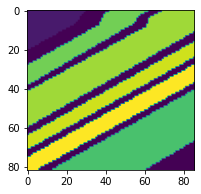

In [ ]:
figure(figsize=(3,3))
imshow(label)

## Your task
- Step 1: Reshape the image data into the $X$ matrix with the shape $N\times D= 7138\times 204$. Build the similarity graph with the **symmetric KNN** and find the weight matrix $\m{W}$.

- Step 2:  Run spectral clustering on this data, using a sparse Laplacian with different numbers of nearest neighbors and $K = 6$ clusters. How do the results compare to the ground truth data?

- Step 3: Plot the first 10 eigenvalues of the data for different choices of $\sigma$. What does the eigengap estimate as
the number of clusters for these choices of $\sigma$?

- Step 4: Compare the projections onto the first three principle components with the first three Laplacian eigenvectors by plotting both sets in different figures. How do the representations differ
qualitatively?

In [ ]:
# Your code starts here

# Your answer:



---


# Optional question (***)
 If you can handle the previous dataset well, you can uncomment the following code. Now your dataset $N$ is more than $10^5$ and all brute force methods will fail here. Also the number of cluster is also much higher (about 16 clusters). Try it out. Having fun! 

In [ ]:
#!wget https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW2/Salinas_corrected.mat?raw=true -O Salinas_corrected.mat
# data = loadmat('Salinas_corrected.mat')
# image = data['salinas_corrected']

